<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

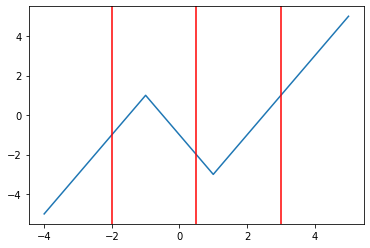

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the graphs
graph_passes = np.array([[-4, -5],
                         [-3, -3],
                         [-2, -1],
                         [-1, 1],
                         [0, -1],
                         [1, -3],
                         [2, -1],
                         [3, 1],
                         [4, 3],
                         [5, 5]])

graph_doesnt_pass = np.array([[-4, 0],
                              [-3, 0.5],
                              [-1, 3.5],
                              [0, 4],
                              [1, 3.5],
                              [3, 0.5],
                              [4, 0],
                              [3, -.5],
                              [1, -3.5],
                              [0, -4],
                              [-1, -3.5],
                              [-3, -0.5],
                              [-4, 0]])

# Unzip the passing graph array to plot it
x, y = zip(*graph_passes)

# Plot the graph
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axvline(-2, color='r')
ax.axvline(0.5, color='r')
ax.axvline(3, color='r')
plt.show()

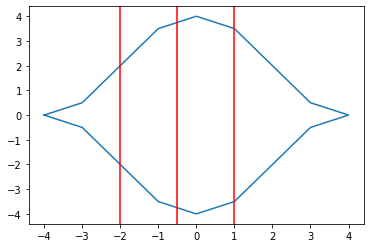

In [3]:
# Unzip the second graph
x, y = zip(*graph_doesnt_pass)

# Plot the graph that doesn't pass the test
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axvline(-2, color='r')
ax.axvline(-0.5, color='r')
ax.axvline(1, color='r')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

The point of a function is that for every $x$ value, there is some corrosponding $y$ value which is the result of the $x$ value being passed through the function. There can be no function wherein one $x$ value has two or more $y$ values as a result of the same function.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

**Answer:**

Only Relation 2 is a function, because it is the only relation that doesn't have multiple $y$ values for the same $x$ value. Relation 1 fails the vertical line test at $x=1$, Relation 3 at $x=9$, Relation 4 at $x=6$, and Relation 5 at $x=2$.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

**Answer:**
For function $m$, the dimensionality of both the input and output is $\mathbb{R}^3$. For function n, the dimensionality of the input is $\mathbb{R}^4$, but it's output is only $\mathbb{R}^2$.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

**Answer:** Certainly. In matrices, this would be some sort of matrix like:
\begin{align}
M = \begin{bmatrix} 7 & 1 \\ 1 & 5 \\ 3 &  5 \end{bmatrix}
\end{align}

This matrix defines a plane within 3D space using two unit vectors, thus having an input dimensionality of $\mathbb{R}^2$, yet an output dimensionality of $\mathbb{R}^3$.

In terms of programming functions, it's quite easy to pull multiple outputs from data inputted; simply return multiple variables. One prime example is the stretch goal function from yesterday's assignment which returns the mean, variance, and standard deviation given a list of numbers.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

**Answer:**
\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = x_1\begin{bmatrix} 1 \\ -1 \end{bmatrix} + x_2\begin{bmatrix}3 \\ 2 \end{bmatrix}, p_T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = x_1\begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix} + x_2\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix} + x_3\begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}, q_T = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [12]:
# Create the various unit vectors and transformation matrixes
func_p_x1 = np.array([1, -1])
func_p_x2 = np.array([3, 2])
func_p_matrix = np.array([[1, 3],[-1, 2]])

func_q_x1 = np.array([4, -1, 5])
func_q_x2 = np.array([1, 2, 1])
func_q_x3 = np.array([2, 3, -2])
func_q_matrix = np.array([[4, 1, 2], [-1, 2, 3], [5, 1, -2]])


# Create test inputs
test_input_p = [5, 10]
test_input_q = [8, 7, 3]

# test the inputs for function p
x1, x2 = zip(test_input_p)
test_input_p_result_units = np.array([x1 * func_p_x1,
                                      x2 * func_p_x2])
test_input_p_result_matrix = np.matmul(func_p_matrix, test_input_p)

print(f'Function p Unit Vector Result:\n{test_input_p_result_units}\n\nFunction p Matrix Multiplication Result:\n{test_input_p_result_matrix}\n\n')

# Test the inputs for function q
x1, x2, x3 = zip(test_input_q)
test_input_q_result_units = np.array([x1 * func_q_x1,
                                      x2 * func_q_x2,
                                      x3 * func_q_x3])
test_input_q_result_matrix = np.matmul(func_q_matrix, test_input_q)

print(f'Function q Unit Vector Result:\n{test_input_q_result_units}\n\nFunction q Matrix Multiplication Result:\n{test_input_q_result_matrix}\n\n')

# Looks good.

Function p Unit Vector Result:
[[ 5 -5]
 [30 20]]

Function p Matrix Multiplication Result:
[35 15]


Function q Unit Vector Result:
[[32 -8 40]
 [ 7 14  7]
 [ 6  9 -6]]

Function q Matrix Multiplication Result:
[45 15 41]




# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

**Answer:** Eigenvalues and eigenvectors are important to keep track of, because when doing a linear transformation, it's important to know around which axis you are transforming the matrix/grid/etc. Without knowing the eigenvector and its corresponding eigenvalue that you're transforming around, you lose grounding for your transformation and as such, it becomes much more difficult to calculate the transformation itself.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

**Answer:** The more dimensions you have to deal with, the harder it is to display in a visual medium, as well as the exponential rise in computation that comes with computing all those dimensions.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

**Answer:** You should always have five times the number of observations as parameters in your model.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [13]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [14]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [15]:
# check for null values
national.isnull().sum().any()

False

In [16]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [17]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [18]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [19]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [22]:
### MY CODE STARTS HERE
# Start doing PCA by importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the matrix
x = np.array(national_processed)
print(f'Data:\n{x}')

# Standardize the matrix via StandardScaler
scaler = StandardScaler()

# Use StandardScaler to fit the data
z = scaler.fit_transform(x)
print(f'\nStandardized Data:\n{z}')

# Create the PCA
pca = PCA(2)

# Fit the data
pca.fit(z)

# Print the eigenvalues and vectors
print(f'\nEigenvalues:\n{pca.components_}')
print(f'\nEigenvectors:\n{pca.explained_variance_}')

# Transform the data
b = pca.transform(z)
print(f'\nProjected Data:\n{b}')

Data:
[[0.0000e+00 8.2000e+01 2.0000e+00 ... 2.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 5.0000e+01 4.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.0000e+00 5.3000e+01 4.0000e+00 ... 3.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.4532e+04 2.3000e+01 1.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]
 [6.4533e+04 5.7000e+01 0.0000e+00 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [6.4534e+04 6.6000e+01 3.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]]

Standardized Data:
[[-1.73202397  1.48807451  0.60878419 ...  0.54947295 -0.46210707
   0.        ]
 [-1.73197029  0.08881241  2.18426992 ... -0.54470863 -0.46210707
   0.        ]
 [-1.73191661  0.21999323  2.18426992 ...  1.64365453 -0.46210707
   0.        ]
 ...
 [ 1.73191661 -1.09181499 -0.17895868 ...  1.64365453  2.16400067
   0.        ]
 [ 1.73197029  0.39490099 -0.96670154 ... -0.54470863  2.16400067
   0.        ]
 [ 1.73202397  0.78844346  1.39652706 ... -0.54470863 -0.46210707
   0.        ]]

Eigenvalues:
[[-0.01762294  0.0456417

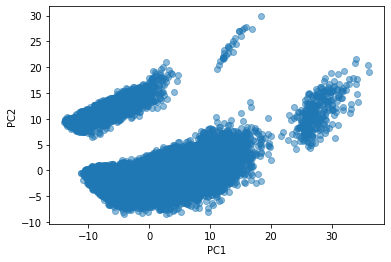

In [30]:
# Plot PC1 against PC2 with a scatterplot

# unzip the standardized data in b
pc1, pc2 = zip(*b)

fig, ax = plt.subplots()
ax.scatter(pc1, pc2, alpha=.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)